# Random digits of $\pi$

A long time ago one of my children was into memorizing digits of $\pi$. When he was rattling them off, I happened to notice that he rarely said zero. So we got into a conversation about whether the digits of $\pi$ are random and whether zero being so rare in the first few dozen digits was an oddity. This post explores that idea a little.

Here's the first 50 digits of $\pi$. Note that there's only one zero:

In [70]:
N[Pi,50]

3.1415926535897932384626433832795028841971693993751

The only zero is the 33rd digit. Assuming the digits are random, what are the chances of going that many digits without using a zero? Well, if we choose 32 consecutive digits, the chances that any one of them was not zero is 9/10. So getting 32 of them in a row, again assuming it's random, has a probability of (9/10)^32:

In [72]:
N[(9/10)^32]

0.0343368

or just over 3% chance of that happening. Is that too small? I guess I'm not sure.

But then I got to thinking: Could it be that there are other bases where the representation of $\pi$ starts without using all the digits for an even less likely amount of digits? For example, here's $\pi$ in base 2. You'll note you don't have to go all that far to see both digits (0 and 1) being used:

In [78]:
BaseForm[N[Pi,10],2]

11.0010010000111111011010101000100
                                  2

What I wanted to know is the number of consecutive digits before all digits are used in lots of different base representations of $\pi$. Here's a plot of that for lots of them:

-Graphics-
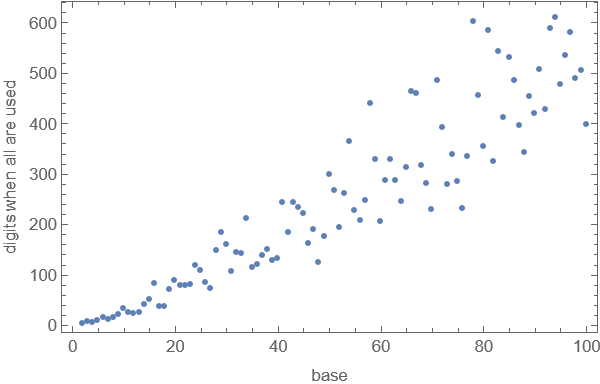

In [82]:
ListPlot[allbases=Table[digits=RealDigits[Pi,base,700][[1]];
    list={digits[[1]]};
    i=2;
    While[Length[list]<base,list=Union[Append[list,digits[[i]]]];i++];
    {base,i},{base,2,100}],FrameLabel->{"base","digits when all are used"},Frame->True]

Cool, right? What do we make of that? There's a lot of variability, but let's make sure we understand the general trend upwards. As you go up in base number, you have more digits to choose from. So it should take longer before you use them all. Most individual digits, assuming $\pi$ is random, will likely show up after roughly base/2 digits. That's the same as saying that the chances hit 50% after that many:

-1 + b b/2
(------)
   b
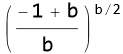

In [83]:
((b-1)/b)^(b/2)

-Graphics-
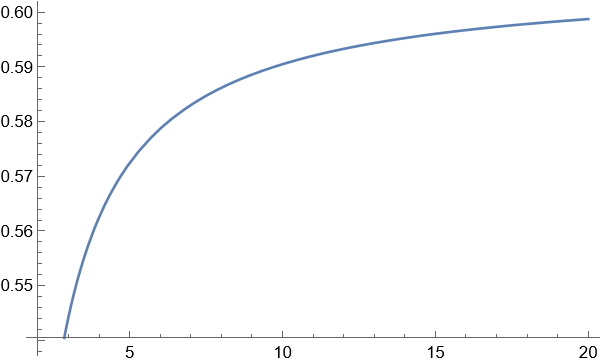

In [84]:
Plot[%,{b,2,20}]

Aha, so really that back-of-the-envelope guess is a little off. This calculation shows that there's a 60% chance that after 10 digits in base 20, one digit still hasn't been used. But close enough, I think.

So what are the chances of a truly random distribution of digits producing the highest points in the curve above? Here's a plot of the chances of achieving all of those strings of "all but one digit" for a random distribution (note it's a log plot):

-Graphics-
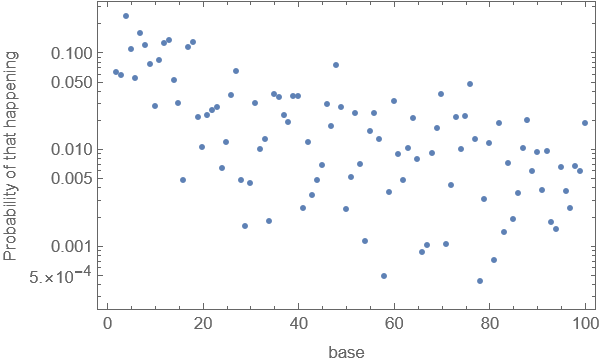

In [89]:
ListLogPlot[allbases=Table[digits=RealDigits[Pi,base,700][[1]];
    list={digits[[1]]};
    i=2;
    While[Length[list]<base,list=Union[Append[list,digits[[i]]]];i++];
    {base,N[((base-1)/base)^i]},{base,2,100}],Frame->True,FrameLabel->{"base","Probability of that happening"}]

If you'd rather say it with phrases like "one chance in . . ." here you go:

-Graphics-
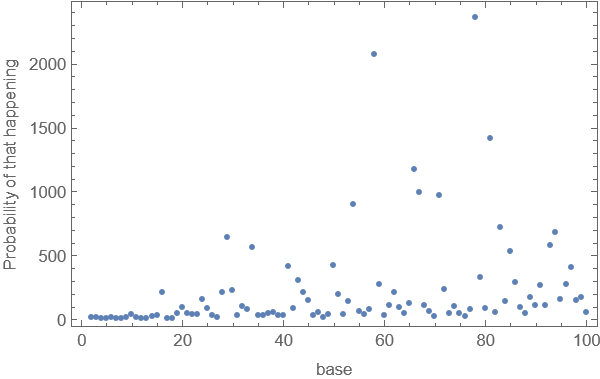

In [92]:
ListPlot[allbases=Table[digits=RealDigits[Pi,base,700][[1]];
    list={digits[[1]]};
    i=2;
    While[Length[list]<base,list=Union[Append[list,digits[[i]]]];i++];
    {base,N[1/((base-1)/base)^i]},{base,2,100}],Frame->True,FrameLabel->{"base","Probability of that happening"},PlotRange->All]

Note, we're back to a linear plot with that. So that top point, for base = 78, is saying that there's only a 1 in over 2000 chance that you'd go that many digits (601) at the beginning of $\pi$ without using all 78 digits.

## Your thoughts

I'd love to hear your thoughts. Here are a few starters for you:

1. I love this. I particularly like . . .
2. I hate this. In particular, ______, is dumb.
3. I don't think the first digit of pi is random. If it's defined to be the ratio of circumference to diameter of a circle, it seems like it can't be zero. Therefore this whole post is pointless.
4. If you had done this in python it would have been cooler.
5. Why aren't you waiting for next March to post this?
6. Why don't you put axel labels on all your plots?
7. I see you just arbitrarily calculate 700 digits of pi and then do the statistics. Why not generate each digit one at a time and stop when you've used all the digits? What a waste of time!